# Objective
In this notebook, I am simply implementing one-vs-one models. Raw intruder data is used, however, in subsequent notebooks, SMOTE and gaussian noise methods will be implemented to preserve the privacy of the intruders. 

In [13]:
import codecs
import utility_functions_v2 as util
import one_vs_rest_util as ovr_util
import load_buffalo_data as data_loader
import cnn_lstm_models as models
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [14]:
import importlib
importlib.reload(data_loader)
importlib.reload(util)
importlib.reload(models)
importlib.reload(ovr_util)

<module 'one_vs_rest_util' from 'C:\\Users\\nyein\\Intership_proj\\keystroke_dynamics\\initial_testing_phase\\one_vs_rest_util.py'>

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input, Dropout,LSTM,TimeDistributed,GRU , Bidirectional,BatchNormalization,Activation
from tensorflow.keras.models import  Sequential, Model, load_model
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix
from collections import Counter
from tensorflow.keras import backend as K
from sklearn.metrics import roc_auc_score

In [4]:
seq_length = 30
cnn_units = 32
lstm_units = 120
weight_decay = 1e-6
batch_size = 64
epochs = 150
optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0001)
optimizer_2 = tf.keras.optimizers.Adadelta(learning_rate=0.001, rho=0.95, epsilon=1e-08)
loss_func = ["binary_crossentropy",models.custom_loss]
early_stopping,learning_rate_reduction = models.get_call_backs()

In [5]:
user_id = "005"
intruder_id_list = ["080","083","017","019"]

In [15]:
train_data_1, train_label_1, scaler_1 = ovr_util.load_train_data(user_id, intruder_id_list[0], seq_length)
test_data_1,test_label_1 = ovr_util.load_test_data(user_id, intruder_id_list[0], scaler_1, seq_length)

not found!! popping from list
not found!! popping from list
not found!! popping from list
not found!! popping from list
Train data shape: (22689, 30, 4, 1), Train label shape: (22689, 1)
test_data shape: (1000, 30, 4, 1), test_label shape: (1000, 1)


In [10]:
train_data_2, train_label_2, scaler_2 = ovr_util.load_train_data(user_id, intruder_id_list[1], seq_length)
test_data_2,test_label_2 = ovr_util.load_test_data(user_id, intruder_id_list[1], scaler_2, seq_length)

Train data shape: (20033, 30, 4, 1), Train label shape: (20033, 1)
test data before reshape: (1000, 30, 4)
test data after reshape: (1000, 120)
test_data shape: (1000, 30, 4, 1), test_label shape: (1000, 1)


In [11]:
train_data_3, train_label_3, scaler_3 = ovr_util.load_train_data(user_id, intruder_id_list[2], seq_length)
test_data_3,test_label_3 = ovr_util.load_test_data(user_id, intruder_id_list[2], scaler_3,seq_length)

Train data shape: (18199, 30, 4, 1), Train label shape: (18199, 1)
test data before reshape: (1000, 30, 4)
test data after reshape: (1000, 120)
test_data shape: (1000, 30, 4, 1), test_label shape: (1000, 1)


In [12]:
train_data_4, train_label_4, scaler_4 = ovr_util.load_train_data(user_id, intruder_id_list[3], seq_length)
test_data_4,test_label_4 = ovr_util.load_test_data(user_id, intruder_id_list[3], scaler_4, seq_length)

Train data shape: (18754, 30, 4, 1), Train label shape: (18754, 1)
test data before reshape: (1000, 30, 4)
test data after reshape: (1000, 120)
test_data shape: (1000, 30, 4, 1), test_label shape: (1000, 1)


## 3. Training

In [ ]:
model_1 = models.build_cnn_lstm_model_ver3(LSTM,False,32,80,0.3,(seq_length,4,1))
history_1 = models.train_model(model_1,optimizer,loss_func[0],epochs,batch_size,train_data_1,train_label_1,[early_stopping])

In [ ]:
model_2 = models.build_cnn_lstm_model_ver3(LSTM,False,32,120,0.3,(seq_length,4,1))
history_2 = models.train_model(model_2,optimizer,loss_func[0],epochs,batch_size,train_data_2,train_label_2,[early_stopping])

cnn_lstm configuration 3
Epoch 1/150
214/214 [==============================] - 5s 24ms/step - loss: 0.6246 - acc: 0.5781 - auroc: 0.6283 - val_loss: 0.6160 - val_acc: 0.5969 - val_auroc: 0.6538
Epoch 2/150
214/214 [==============================] - 4s 19ms/step - loss: 0.6092 - acc: 0.6018 - auroc: 0.6635 - val_loss: 0.6634 - val_acc: 0.5622 - val_auroc: 0.7669
Epoch 3/150
214/214 [==============================] - 4s 19ms/step - loss: 0.5906 - acc: 0.6466 - auroc: 0.7187 - val_loss: 0.6226 - val_acc: 0.6178 - val_auroc: 0.7625
Epoch 4/150
214/214 [==============================] - 4s 19ms/step - loss: 0.5584 - acc: 0.6933 - auroc: 0.7744 - val_loss: 0.5246 - val_acc: 0.7015 - val_auroc: 0.8348
Epoch 5/150
214/214 [==============================] - 4s 19ms/step - loss: 0.4940 - acc: 0.7534 - auroc: 0.8364 - val_loss: 0.4593 - val_acc: 0.7602 - val_auroc: 0.8876
Epoch 6/150
214/214 [==============================] - 4s 19ms/step - loss: 0.4455 - acc: 0.7849 - auroc: 0.8742 - val_loss: 

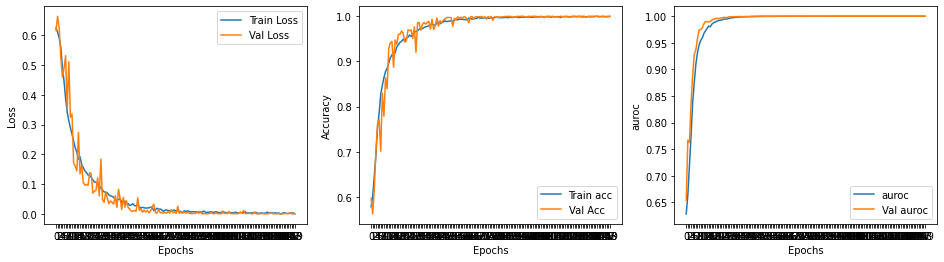

In [ ]:
model_3 = models.build_cnn_lstm_model_ver3(LSTM,False,128,80,0.3,(seq_length,4,1))
history_3 = models.train_model(model_3,optimizer,loss_func[0],epochs,batch_size,train_data_3,train_label_3,[early_stopping])

In [ ]:
model_4 = models.build_cnn_lstm_model_ver3(LSTM,False,32,100,0.3,(seq_length,4,1))
history_4 = models.train_model(model_4,optimizer,loss_func[0],epochs,batch_size,train_data_4,train_label_4,[early_stopping])

## 4.Testing with unseen data

### 4.1 Testing model-1 

In [ ]:
#testing cnn-lstm model-binary_crossentropy
(prediction_1,predicted_classes_1),(tn_1, fp_1, fn_1, tp_1), (FAR_1,FRR_1,EER_1) =  models.perform_testing(model_1,test_data_1,test_label_1,0.5)

TN:    449,    FP:   51,   FN:   26,   TP:   474
FAR:   0.102,   FRR:   0.052,   EER:   0.09714285714285714


In [ ]:
#testing cnn-lstm model-binary_crossentropy
(prediction_2,predicted_classes_2),(tn_2, fp_2, fn_2, tp_2), (FAR_2,FRR_2,EER_2) =  models.perform_testing(model_2,test_data_2,test_label_2,0.5)

TN:    496,    FP:   4,   FN:   25,   TP:   475
FAR:   0.008,   FRR:   0.05,   EER:   0.04798464491383928


In [ ]:
#testing cnn-lstm model-binary_crossentropy
(prediction_3,predicted_classes_3),(tn_3, fp_3, fn_3, tp_3), (FAR_3,FRR_3,EER_3) =  models.perform_testing(model_3,test_data_3,test_label_3,0.5)

TN:    492,    FP:   8,   FN:   82,   TP:   418
FAR:   0.016,   FRR:   0.164,   EER:   0.1428571428571429


In [ ]:
#testing cnn-lstm model-binary_crossentropy
(prediction_4,predicted_classes_4),(tn_4, fp_4, fn_4, tp_4), (FAR_4,FRR_4,EER_4) =  models.perform_testing(model_4,test_data_4,test_label_4,0.5)

TN:    475,    FP:   25,   FN:   20,   TP:   480
FAR:   0.05,   FRR:   0.04,   EER:   0.04950495049504951
